#Prueba Final del Proyecto: Predicción de Obesidad a partir de Hábitos de Vida”


**Nombre de los integrantes del grupo:**

- Santiago Simmonds Rodriguez
- Cristian David Baez
- German Alonso Rodriguez
- Jose David Mariño


Desarrollar un modelo de predicción de obesidad optimizado y validado, aplicando técnicas de exploración no supervisada y supervisada, y estructurarlo en una presentación completa y organizada.

***El problema nos entrega un dataset que plantea estimar el nivel de obesidad en personas basado en habitos alimenticios y condiciones fisicas. Para ello debemos complementar el análisis con un modelo supervisado***

In [1]:
pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [3]:
# Cantidad de variables y registros en los datasets

print("Cantidad de variables: ", len(X.columns))
print("Cantidad de registros: ", len(X))

# Determinar variables numéricas y variables cialitativas, y los tipos de variables

print("Variables numéricas: ", X.select_dtypes(include=['int64', 'float64']).columns.tolist())
print("Variables cualitativas: ", X.select_dtypes(include=['object']).columns.tolist())



Cantidad de variables:  16
Cantidad de registros:  2111
Variables numéricas:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Variables cualitativas:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [4]:
# Importe de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Creación de dataframes

df = pd.DataFrame(X)
df_y = pd.DataFrame(y)

print(df.head())
print(df_y.head())
print(df.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
            NO

***METODO DEL CODO PARA DEFINIR # CLUSTERS***

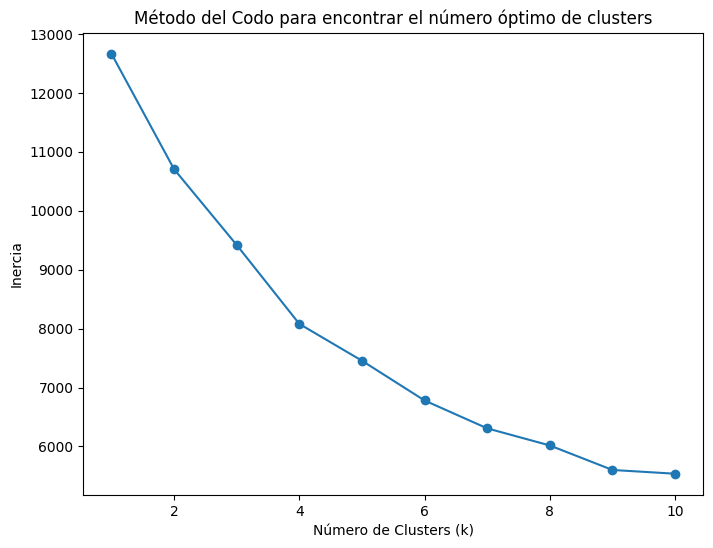

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Combinar df y df_y para tener las variables cuantitativas y los clusters en el mismo DataFrame
df_combined = pd.concat([df, df_y], axis=1)  # Combinar por columnas, suponiendo que están alineados por índice


# Seleccionar las variables cuantitativas y aplicar t-SNE
# Filtramos solo las columnas cuantitativas
X_cuantitativo = df_combined[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]

# Escalamos las variables cuantitativas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cuantitativo)

# Usamos el método del codo para encontrar el número óptimo de clusters
inertia = []
k_values = range(1, 11)  # Probaremos de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()


***METODO DE LA SILUETA PARA DEFINIR # DE CLUSTERS***

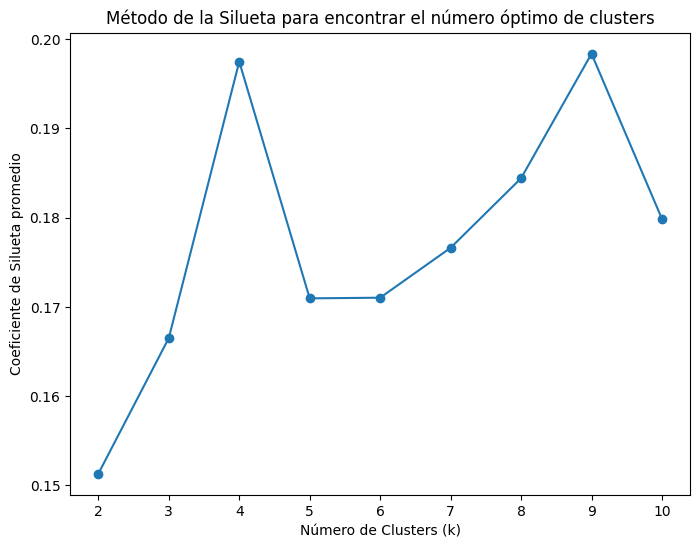

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de valores de k a probar
range_n_clusters = range(2, 11)
silhouette_avg = []

# Iterar sobre diferentes valores de k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)  # X_scaled es el conjunto de datos escalado

    # Calcular la puntuación de silueta media para el valor de k
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Método de la Silueta para encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silueta promedio")
plt.show()


In [7]:
# prompt: Coeficientes de silueta para Kmeans y silhouete score

# Coeficientes de silueta para diferentes valores de k
range_n_clusters = range(2, 11)
silhouette_coefficients = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)

    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es {silhouette_avg}")

Para n_clusters = 2, el coeficiente de silueta promedio es 0.1513108366223862
Para n_clusters = 3, el coeficiente de silueta promedio es 0.1665068024694053
Para n_clusters = 4, el coeficiente de silueta promedio es 0.19748266026343453
Para n_clusters = 5, el coeficiente de silueta promedio es 0.17095785268461255
Para n_clusters = 6, el coeficiente de silueta promedio es 0.1710305080126302
Para n_clusters = 7, el coeficiente de silueta promedio es 0.17662087118575015
Para n_clusters = 8, el coeficiente de silueta promedio es 0.18441303676276993
Para n_clusters = 9, el coeficiente de silueta promedio es 0.19836586530640915
Para n_clusters = 10, el coeficiente de silueta promedio es 0.17985774386474185


A continuación se realiza una reducción en dimensionalidad para visualizar en un plano cartesiano, considerando que se tienen 8 variables cuantitativas.

`Análisis de Componentes Principales (PCA): Proyecta los datos en un número reducido de dimensiones manteniendo la máxima varianza posible.`

`t-SNE (t-distributed Stochastic Neighbor Embedding): Proyecta datos en 2D o 3D, conservando las relaciones de proximidad en los datos originales. Es útil para visualización, pero puede ser más difícil de interpretar en términos de varianza explicada.`

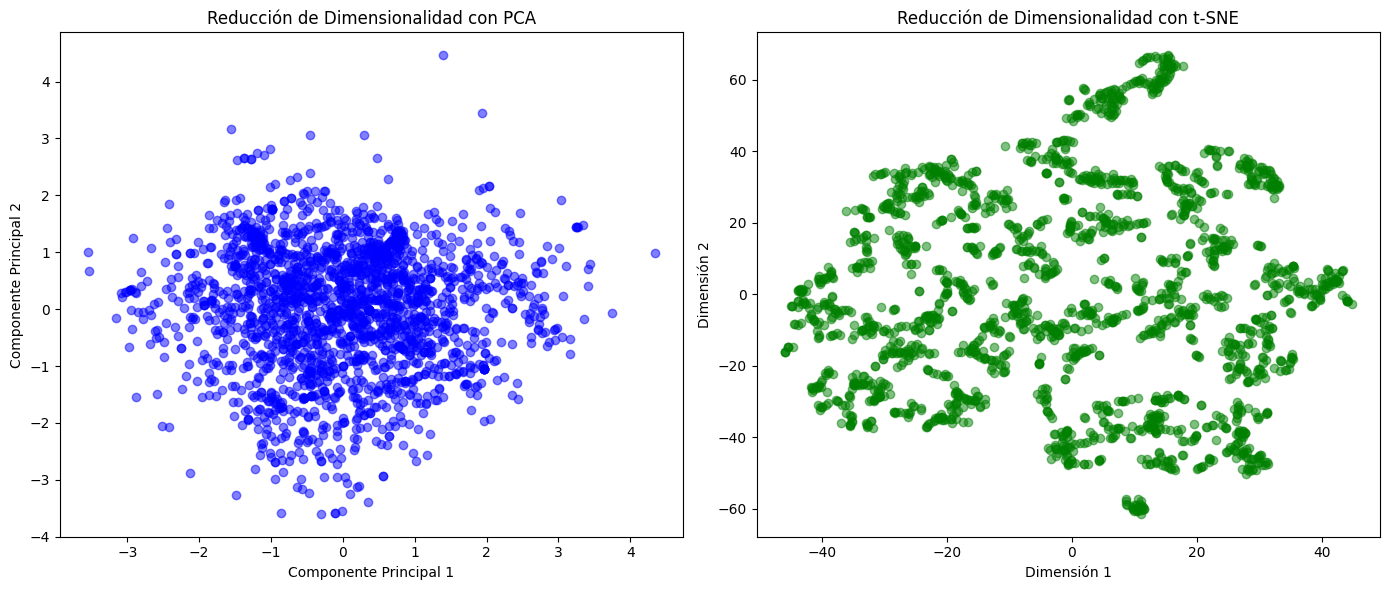

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Suponemos que X_scaled es el dataset cuantitativo ya escalado

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Reducción de dimensionalidad con jerarquico
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Reducción de Dimensionalidad con PCA")

# Visualización t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='green', alpha=0.5)
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.title("Reducción de Dimensionalidad con t-SNE")

plt.tight_layout()
plt.show()


De la reducción de dimensionalidad mediante PCA y t-SNE y considerando la gráfica de metodo de codo, se considera que dividir en 4 clusters la agrupación de datos mediante el metodo PCA representa mejor una agrupación.

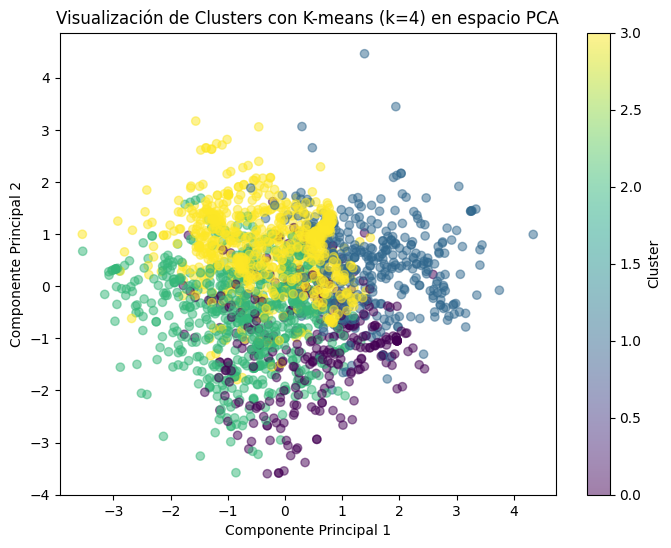

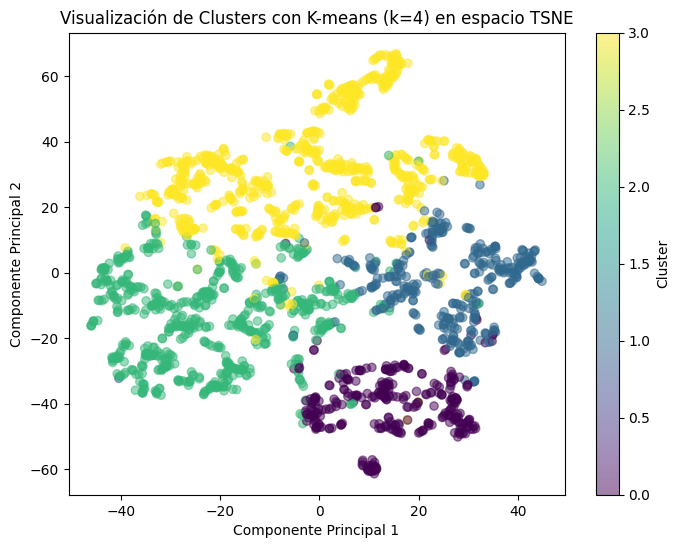

In [9]:
# Aplicar K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_combined['Cluster'] = clusters  # Añadir los clusters al DataFrame combinado

# Reducir dimensionalidad con PCA a 2 componentes para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Visualizar clusters en el espacio reducido de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con K-means (k=4) en espacio PCA")
plt.colorbar(label='Cluster')
plt.show()

# Visualizar clusters en el espacio reducido de tsne
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con K-means (k=4) en espacio TSNE")
plt.colorbar(label='Cluster')
plt.show()

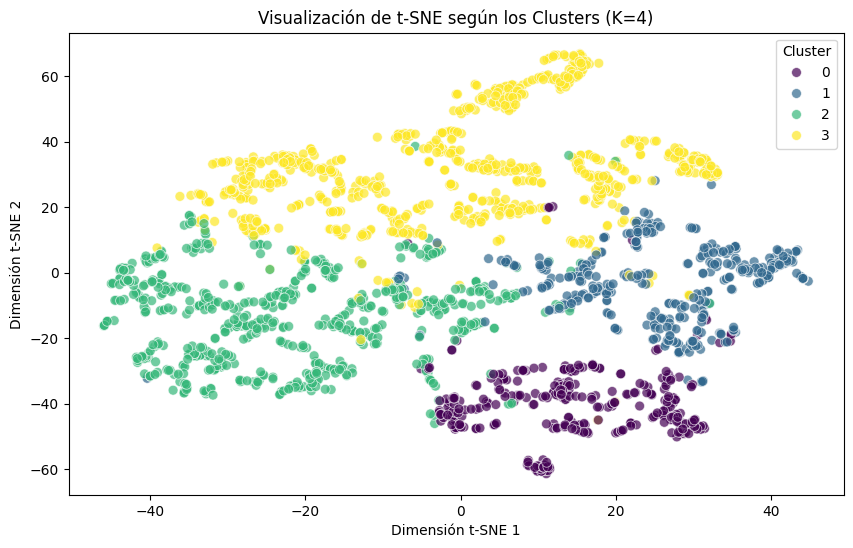

In [10]:
# Agregar los resultados de t-SNE al DataFrame combinado
df_combined['tSNE_1'] = X_tsne[:, 0]
df_combined['tSNE_2'] = X_tsne[:, 1]

# Graficar t-SNE en función de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='Cluster', data=df_combined, palette='viridis', alpha=0.7, s=50)
plt.title('Visualización de t-SNE según los Clusters (K=4)')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')
plt.legend(title='Cluster')
plt.show()

In [11]:
print(X_tsne.shape)
print(X_tsne[:4])


(2111, 2)
[[-17.328962   -29.13167   ]
 [-17.802404    22.546982  ]
 [-31.870121    -8.580243  ]
 [ -0.54215956  17.636194  ]]


La reducción de dimensionalidad se realizó a 2 planos dimensionales x,y.

Se evidencia un mejor agrupamiento mediante el t-SNE1.

Se verifica que el df X_tsne mantiene los 2111 registros en 2 dimensiones.

In [12]:

# Crear el DataFrame
df_tsne_clusters = pd.DataFrame({
    'Registro': range(len(X_tsne)),
    'Cluster': df_combined['Cluster'],
    'X_tsne': X_tsne[:, 0],
    'Y_tsne': X_tsne[:, 1]
})

# Mostrar el DataFrame
print(df_tsne_clusters.head())

   Registro  Cluster     X_tsne     Y_tsne
0         0        2 -17.328962 -29.131670
1         1        3 -17.802404  22.546982
2         2        2 -31.870121  -8.580243
3         3        3  -0.542160  17.636194
4         4        0  11.952937 -36.660164


In [13]:

# Agregando las variables del df_combined al df_tsne_clusters considerando t-sne
df_tsne_clusters = pd.concat([df_tsne_clusters, df_combined], axis=1)

# Display the updated DataFrame
print(df_tsne_clusters.head())
print(df_tsne_clusters.shape)

   Registro  Cluster     X_tsne     Y_tsne  Gender   Age  Height  Weight  \
0         0        2 -17.328962 -29.131670  Female  21.0    1.62    64.0   
1         1        3 -17.802404  22.546982  Female  21.0    1.52    56.0   
2         2        2 -31.870121  -8.580243    Male  23.0    1.80    77.0   
3         3        3  -0.542160  17.636194    Male  27.0    1.80    87.0   
4         4        0  11.952937 -36.660164    Male  22.0    1.78    89.8   

  family_history_with_overweight FAVC  ...  CH2O  SCC  FAF  TUE        CALC  \
0                            yes   no  ...   2.0   no  0.0  1.0          no   
1                            yes   no  ...   3.0  yes  3.0  0.0   Sometimes   
2                            yes   no  ...   2.0   no  2.0  1.0  Frequently   
3                             no   no  ...   2.0   no  2.0  0.0  Frequently   
4                             no   no  ...   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  Cluster     tSNE_1   

In [14]:
df_tsne_clusters.info


<bound method DataFrame.info of       Registro  Cluster     X_tsne     Y_tsne  Gender        Age    Height  \
0            0        2 -17.328962 -29.131670  Female  21.000000  1.620000   
1            1        3 -17.802404  22.546982  Female  21.000000  1.520000   
2            2        2 -31.870121  -8.580243    Male  23.000000  1.800000   
3            3        3  -0.542160  17.636194    Male  27.000000  1.800000   
4            4        0  11.952937 -36.660164    Male  22.000000  1.780000   
...        ...      ...        ...        ...     ...        ...       ...   
2106      2106        3   3.506945  31.917639  Female  20.976842  1.710730   
2107      2107        3  -1.228812  26.997683  Female  21.982942  1.748584   
2108      2108        3  -1.259114  27.102152  Female  22.524036  1.752206   
2109      2109        3 -16.591955  30.654072  Female  24.361936  1.739450   
2110      2110        3 -16.756664  31.412006  Female  23.664709  1.738836   

          Weight family_history

In [15]:
# Reset the index of df_tsne_clusters to ensure unique labels
import matplotlib.pyplot as plt
import seaborn as sns

df_tsne_clusters = df_tsne_clusters.reset_index(drop=True)
df_tsne_clusters = df_tsne_clusters.loc[:, ~df_tsne_clusters.columns.duplicated()]



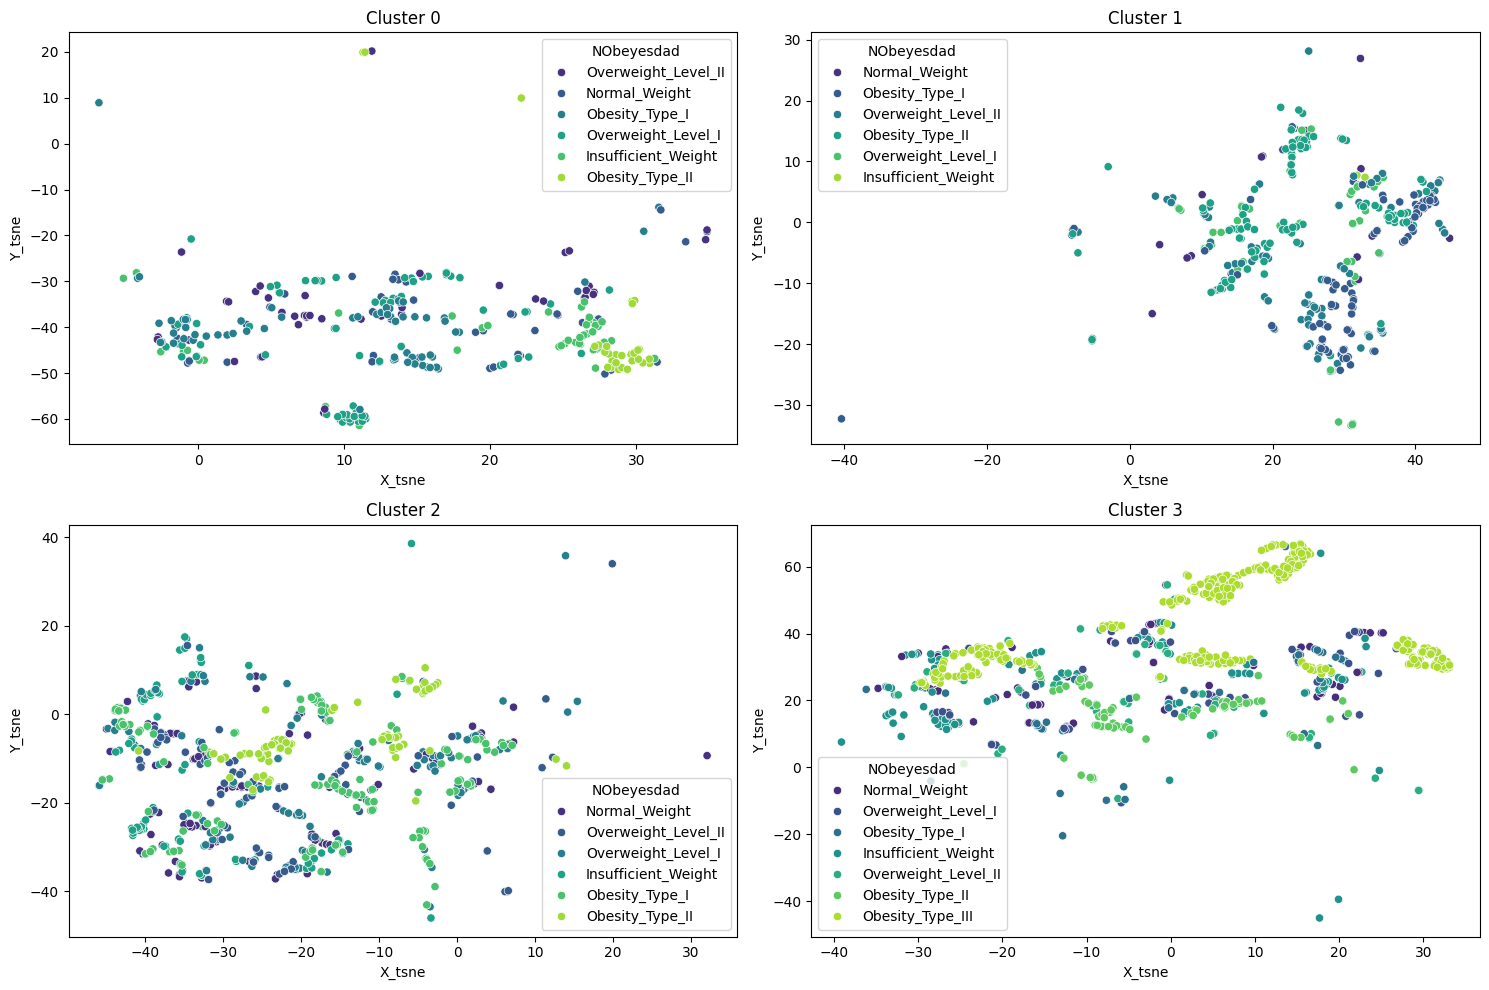

In [16]:
# Visualización de las variables relevantes para cada cluster
plt.figure(figsize=(15, 10))

for i in range(4): #Suponiendo que tienes 4 clusters
  plt.subplot(2, 2, i+1)
  # Now filtering should work correctly
  subset = df_tsne_clusters[df_tsne_clusters['Cluster'] == i]
  sns.scatterplot(x='X_tsne', y='Y_tsne', data=subset, hue='NObeyesdad', palette='viridis')
  plt.title(f'Cluster {i}')

plt.tight_layout()
plt.show()




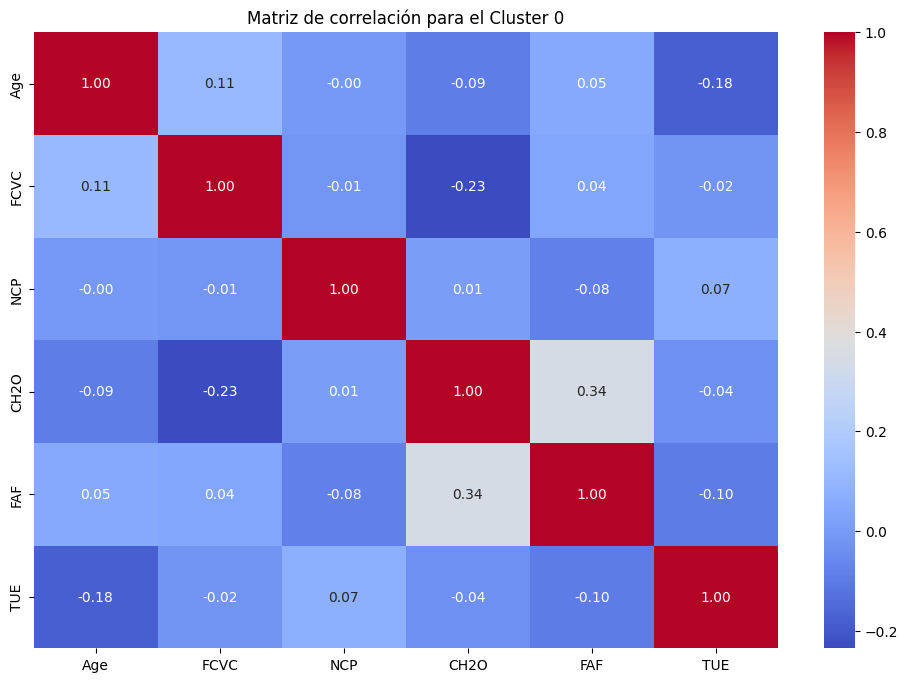

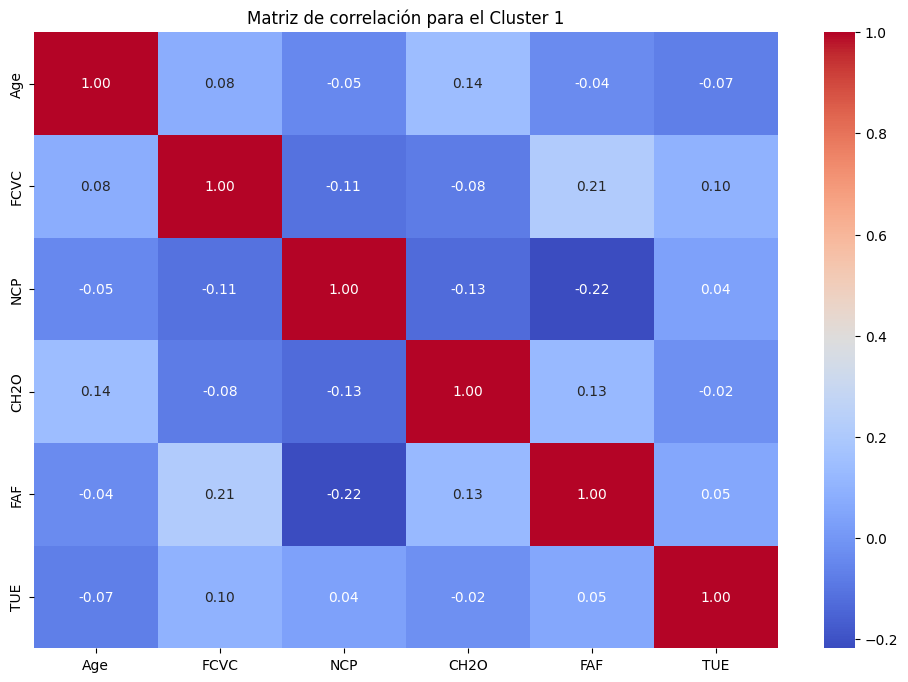

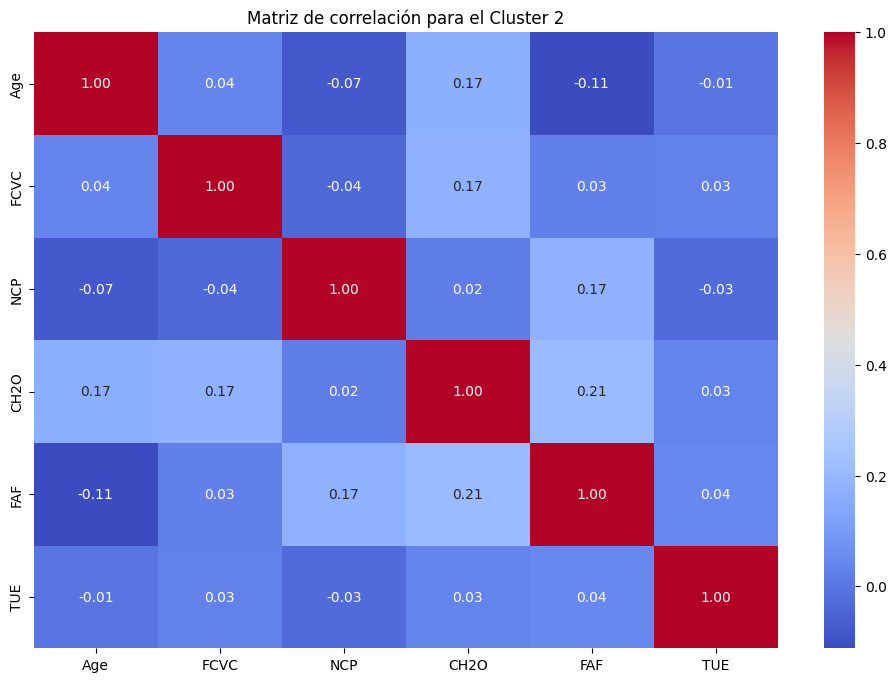

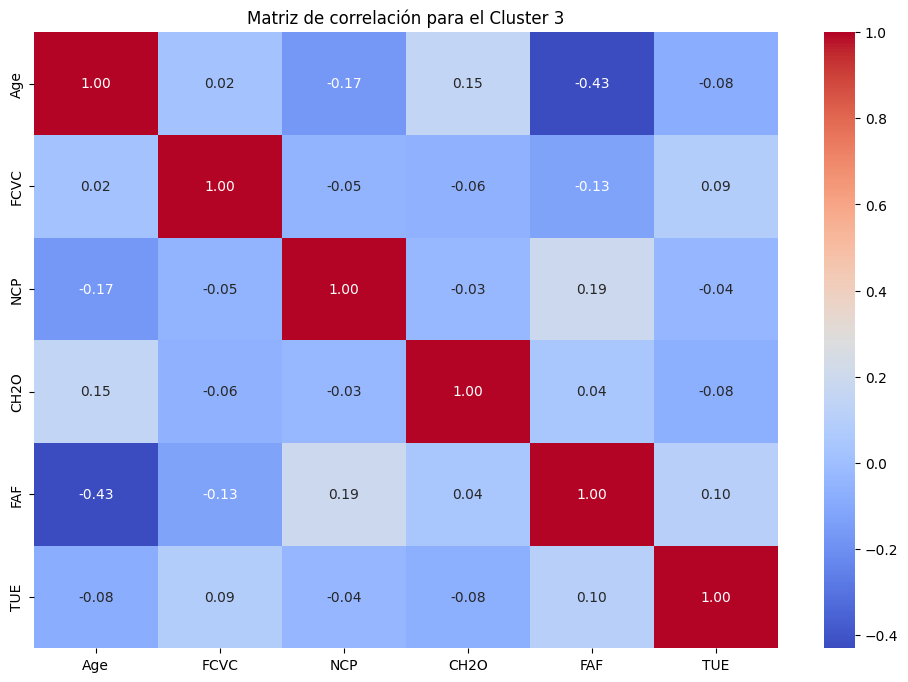

In [17]:
# Boxplots para las variables relevantes en cada cluster y su correlacion
variables_relevantes = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # Reemplaza con tus variables

# Matriz de correlación para cada cluster
for i in range(4):
  subset = df_tsne_clusters[df_tsne_clusters['Cluster'] == i]
  subset = subset[variables_relevantes] ##tomamos solo las variables que ya definimos, exceptuando altura y peso
  plt.figure(figsize=(12, 8))
  sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f'Matriz de correlación para el Cluster {i}')
  plt.show()

En el análisis de correlación podemos obervar que la

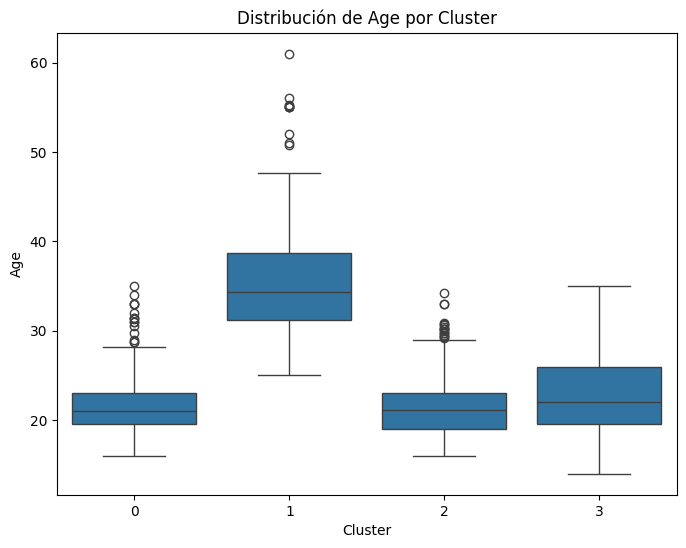

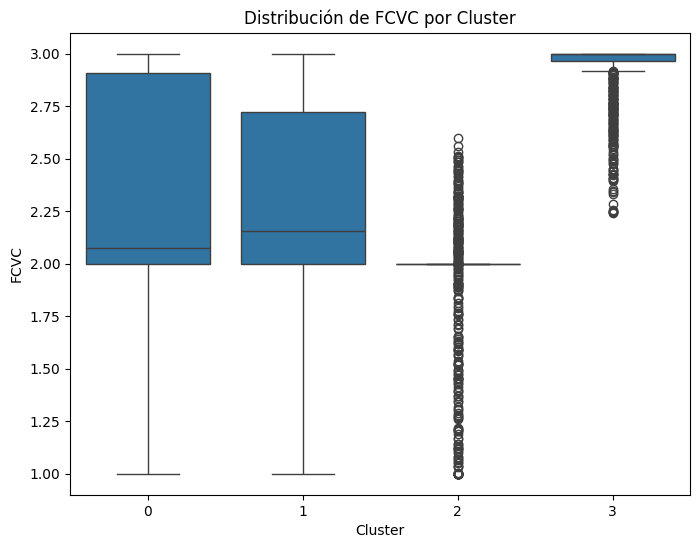

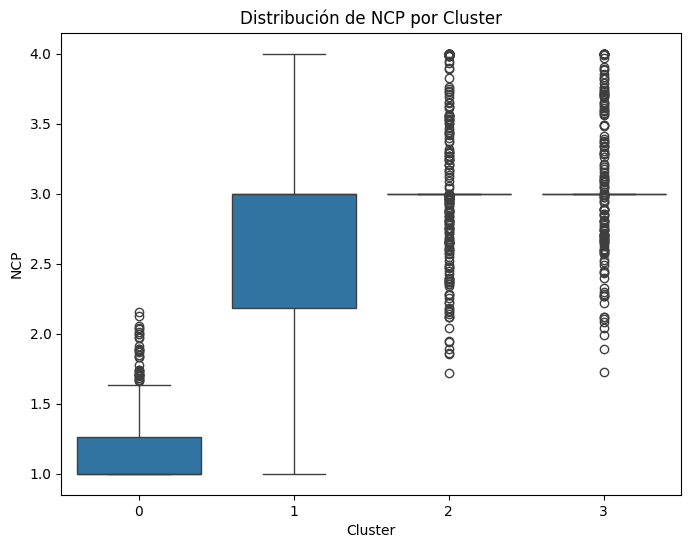

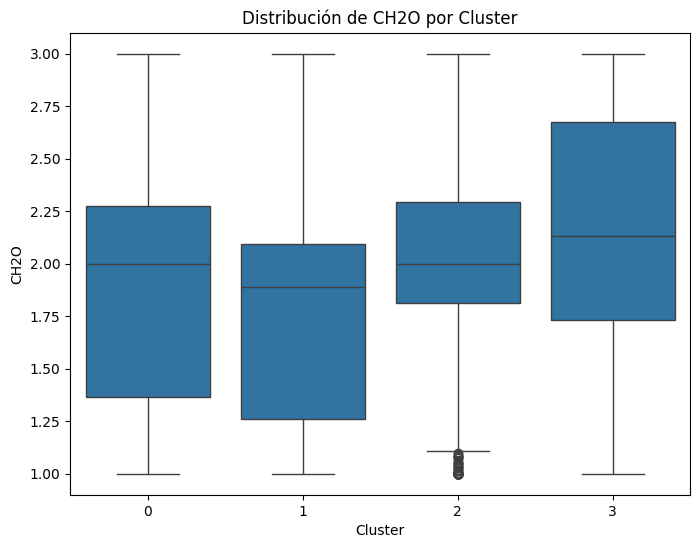

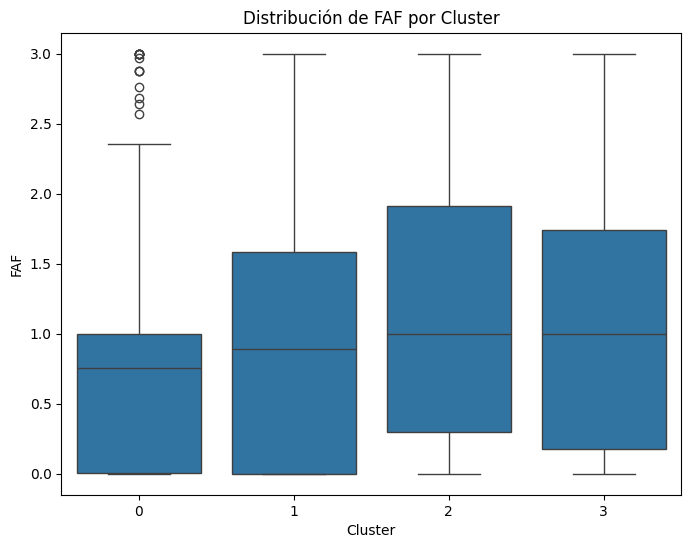

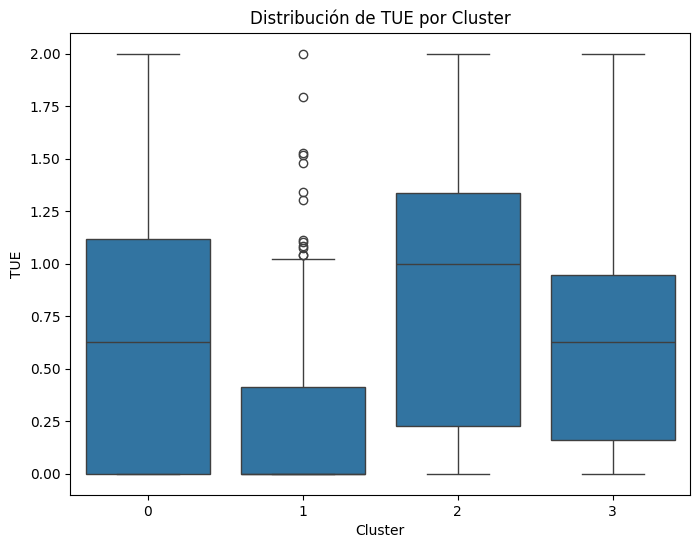

In [18]:
# Boxplots para las variables relevantes en cada cluster definidas en el paso anterior
for var in variables_relevantes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=var, data=df_tsne_clusters)
    plt.title(f'Distribución de {var} por Cluster')
    plt.show()

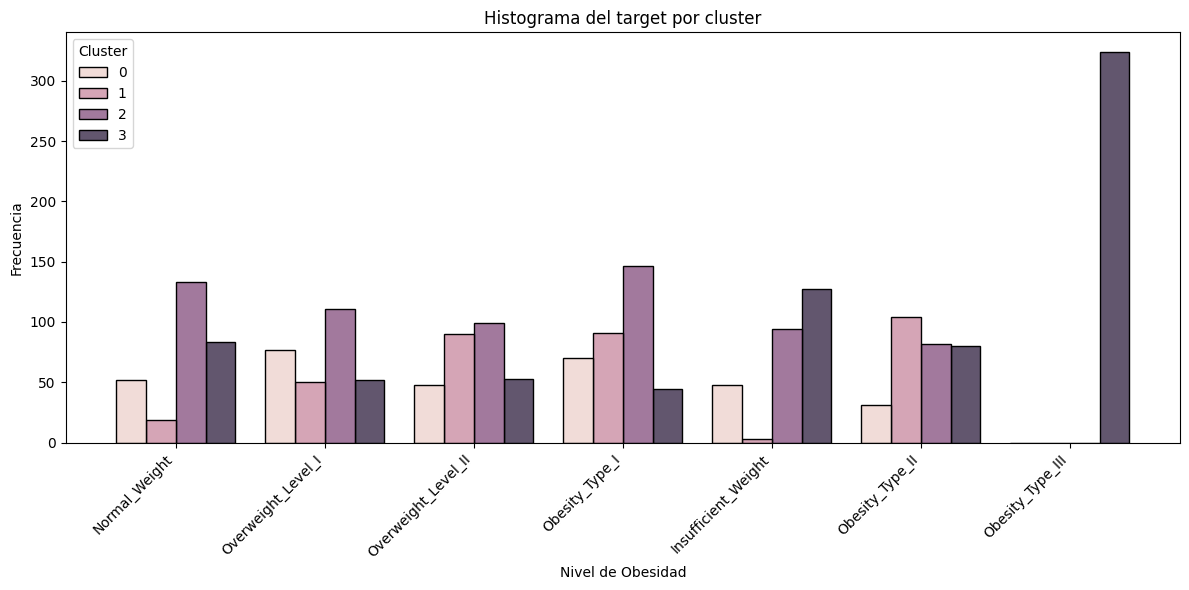

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_tsne_clusters, x='NObeyesdad', hue='Cluster', multiple="dodge", shrink=0.8)
plt.title('Histograma del target por cluster')
plt.xlabel('Nivel de Obesidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El análisis revela que los datos se agrupan en cuatro clusters distintos, donde:

*   Cada uno refleja patrones específicos en relación con el comportamiento y las características de las personas en el conjunto de datos. En particular, se observa que el cuarto cluster destaca por una alta prevalencia de individuos con ***obesity_type_III*** (obesidad), lo cual indica que este grupo está compuesto predominantemente por personas con un alto índice de obesidad. Este hallazgo sugiere que el cluster 4 podría representar a un segmento de la población que enfrenta mayores riesgos de salud relacionados con la obesidad grave, y su distribución en cuanto a las variables como edad, consumo de alimentos rápidos (FCVC), y actividad física (FAF) podría ser muy diferente a la de los otros clusters.
*   El Cluster 0 presenta bajos registros en los niveles de obesidad más alarmantes ***obesity_type_III y obesity_type_II*** , esto quiere decir que las personas que se encuentren en este cluster presentan mejores habitos alimenticios y mejor condición física.

## MODELO SUPERVISADO

In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [21]:
# selección de variables

X = df.drop(columns=['Height', 'Weight'])

y = df_y

In [22]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NObeyesdad  2111 non-null   object
dtypes: object(1)
memory usage: 16.6+ KB


In [24]:
# redondear las variables numéricas `Age`, `FCVC`, `CH2O`, `NCP`,`FAF` y `TUE` con cero decimales

X['Age'] = X['Age'].round(0)
X['FCVC'] = X['FCVC'].round(0)
X['CH2O'] = X['CH2O'].round(0)
X['FAF'] = X['FAF'].round(0)
X['TUE'] = X['TUE'].round(0)
X['NCP'] = X['NCP'].round(0)


# cambiar el tipo de dato a categorico

X['FCVC'] = X['FCVC'].astype('object')
X['CH2O'] = X['CH2O'].astype('object')
X['FAF'] = X['FAF'].astype('object')
X['TUE'] = X['TUE'].astype('object')
X['NCP'] = X['NCP'].astype('object')

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   object 
 5   NCP                             2111 non-null   object 
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   object 
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   object 
 11  TUE                             2111 non-null   object 
 12  CALC                            21

In [26]:
# aplicar label encoder a ls variables categóricas

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for var in X.select_dtypes(include='object').columns:
    X[var] = le.fit_transform(X[var])

y = le.fit_transform(y)

c:\Users\Jose\AppData\Local\anaconda3\envs\ml_ean_2024_proyecto\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
X2 = pd.concat([X,df_combined['Cluster']],axis=1) # Concatenate X and 'Cluster' column
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int32  
 3   FAVC                            2111 non-null   int32  
 4   FCVC                            2111 non-null   int32  
 5   NCP                             2111 non-null   int32  
 6   CAEC                            2111 non-null   int32  
 7   SMOKE                           2111 non-null   int32  
 8   CH2O                            2111 non-null   int32  
 9   SCC                             2111 non-null   int32  
 10  FAF                             2111 non-null   int32  
 11  TUE                             2111 non-null   int32  
 12  CALC                            21

In [28]:
# escalar solo la variable que tiene valores muy grandes

X['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1, 1))
X2['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1, 1))

In [29]:
# dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [30]:
# comparación de modelos
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [31]:
# evaluación de los modelos para X (sin considerar caracteristica Cluster)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = {
        'CV mean': cv_scores.mean(),
        'CV std': cv_scores.std()
    }

results_df = pd.DataFrame(results).T
print("\nResultados de la validación cruzada\n")
print(results_df)



Resultados de la validación cruzada

                    CV mean    CV std
Random Forest      0.789688  0.018569
Gradient Boosting  0.767173  0.025747
XGBoost            0.790280  0.020339
SVM                0.689572  0.030535


In [32]:
# Evaluacion de los modelos para X2 (Considerando caracteristica Cluster)

results_cluster = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X2_train, y2_train, cv=5, scoring='accuracy')
    results_cluster[model_name] = {
        'CV mean': cv_scores.mean(),
        'CV std': cv_scores.std()
    }

results_cluster_df = pd.DataFrame(results_cluster).T
print("\nResultados de la validación cruzada con variable cluster\n")
print(results_cluster_df)


Resultados de la validación cruzada con variable cluster

                    CV mean    CV std
Random Forest      0.790276  0.027718
Gradient Boosting  0.763038  0.031381
XGBoost            0.796797  0.018836
SVM                0.688977  0.022381


In [33]:
# optimizar el mejor modelo (XGBoost)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.7],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2 = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search2.fit(X2_train, y2_train)

print(f"\nMejores parámetros sin caracteristica Cluster: {grid_search.best_params_}")
print(f"Mejor score sin Cluster: {grid_search.best_score_}")

print(f"\nMejores parámetros con caracteristica Cluster: {grid_search2.best_params_}")
print(f"Mejor score con Cluster: {grid_search2.best_score_}")


Mejores parámetros sin caracteristica Cluster: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
Mejor score sin Cluster: 0.7867311642933646

Mejores parámetros con caracteristica Cluster: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}
Mejor score con Cluster: 0.787328147770969


In [34]:
# entrenar el modelo optimizado

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
best_model2 = grid_search2.best_estimator_
best_model2.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# evaluar el modelo

y_pred = best_model.predict(X_test)
y2_pred = best_model2.predict(X2_test)

print("\nReporte de clasificación sin considerar caracteristica cluster\n")
print(classification_report(y_test, y_pred))

print("\nReporte de clasificación  considerando caracteristica cluster\n")
print(classification_report(y2_test, y2_pred))


Reporte de clasificación sin considerar caracteristica cluster

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        56
           1       0.70      0.61      0.66        62
           2       0.83      0.81      0.82        78
           3       0.80      0.95      0.87        58
           4       0.95      1.00      0.98        63
           5       0.79      0.75      0.77        56
           6       0.72      0.62      0.67        50

    accuracy                           0.81       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.81      0.80       423


Reporte de clasificación  considerando caracteristica cluster

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        56
           1       0.70      0.61      0.66        62
           2       0.81      0.78      0.80        78
           3       0.81      0.95      0.87        58
   

En general, el modelo sin la característica de clusters presenta métricas levemente superiores en casi todas las categorías. Aunque las diferencias son pequeñas, estas métricas sugieren que el modelo sin clusters tiene un rendimiento ligeramente mejor en términos de precisión y f1-score.


Por lo tanto, el modelo sin considerar la característica de clusters presenta mejores resultados globales, aunque la diferencia es marginal.

Dado lo anterior, se continua el modelo **sin considerar la caracteristica Cluster** para realizar un analisis de las variables y la importancia de las caracteristicas

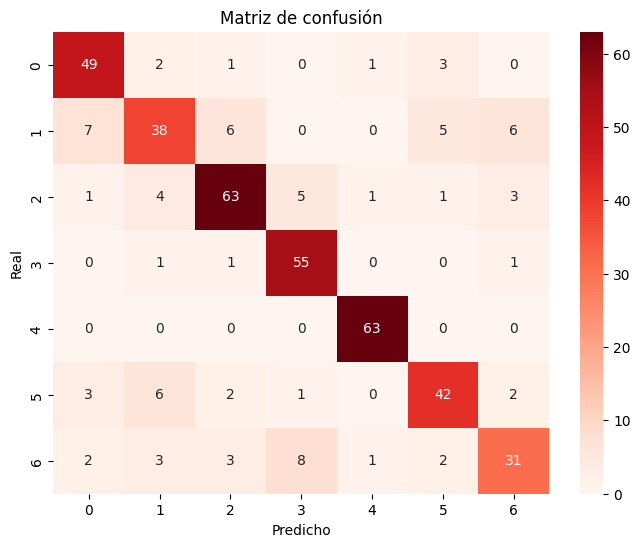

In [36]:
# matriz de confusión considerando modelo sin clusters
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [37]:
# analisis de errores

errors = pd.DataFrame({
    'Real': le.inverse_transform(y_test),
    'Predicho': le.inverse_transform(y_pred),
    'Correcto': y_test == y_pred
})

print("\nErrores de clasificación\n")
print(errors.groupby('Real')['Correcto'].mean())


Errores de clasificación

Real
Insufficient_Weight    0.875000
Normal_Weight          0.612903
Obesity_Type_I         0.807692
Obesity_Type_II        0.948276
Obesity_Type_III       1.000000
Overweight_Level_I     0.750000
Overweight_Level_II    0.620000
Name: Correcto, dtype: float64


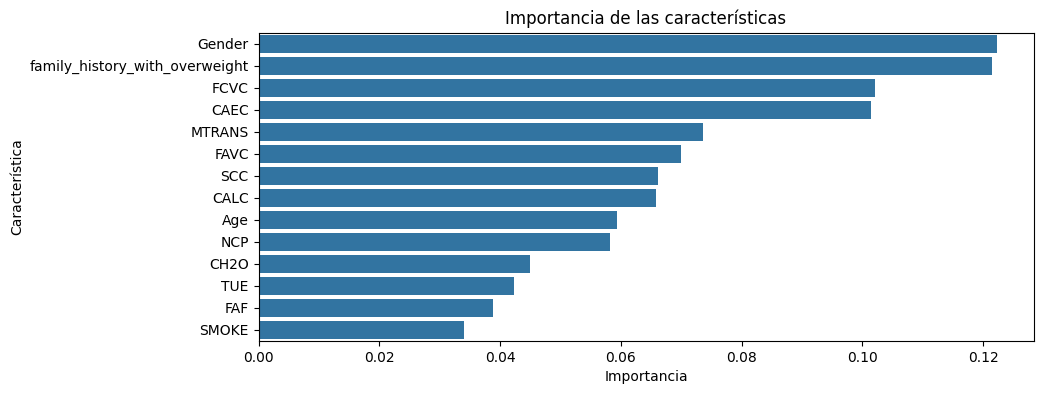

In [38]:
# importancia de características en el modelo optimizado

feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

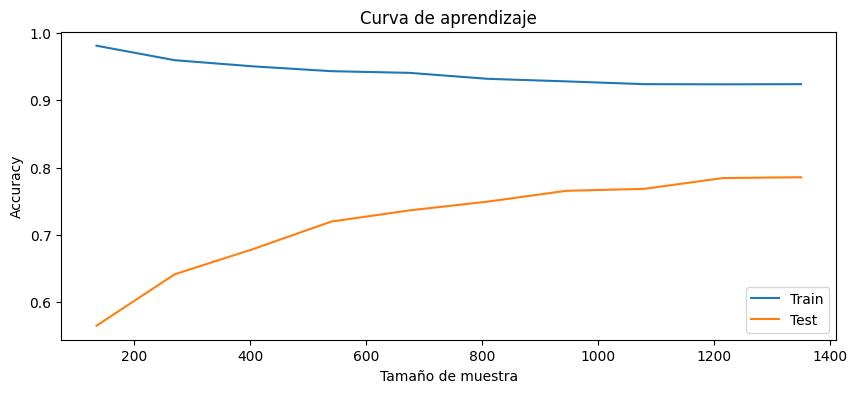

In [39]:
# curva de aprendizaje

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model,
                                                        X_train,
                                                        y_train, cv=5,
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

plt.figure(figsize=(10, 4))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
plt.title('Curva de aprendizaje')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

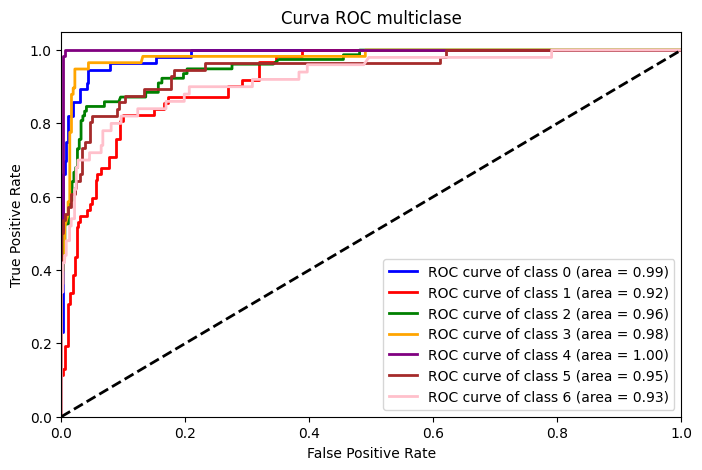

In [40]:
# curva ROC multiclase

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_bin.shape[1]

y_score = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 5))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC multiclase')
plt.legend(loc="lower right")
plt.show()

***Alto Desempeño General:*** Las áreas bajo la curva (AUC) para cada clase están todas por encima de 0.90, lo que indica un alto rendimiento del modelo en la mayoría de las clases. Valores de AUC altos implican que el modelo es bueno diferenciando las clases, ya que obtiene un buen equilibrio entre tasas de verdaderos positivos y tasas de falsos positivos.

**Mejor y Peor Clase Predicha:**

***Clase 4:*** Tiene el área bajo la curva más alta (AUC = 1.00), lo que sugiere que el modelo puede clasificar esta clase casi perfectamente, sin confundirla con otras clases.

***Clases con Desempeño Ligeramente Inferior:*** La **clase 1** (AUC = 0.92) y la **clase 6** (AUC = 0.93) tienen los AUC más bajos, aunque aún están en un rango alto. Esto podría indicar que, en comparación con otras clases, el modelo tiene un poco más de dificultad en distinguir estas clases de otras, probablemente debido a alguna similitud con otras clases en las características que utiliza el modelo.

***Separabilidad entre Clases:*** Los valores de AUC por encima de 0.90 en todas las clases indican que las clases están relativamente bien separadas en el espacio de características, lo cual facilita al modelo hacer buenas predicciones.

***Posible Mejora en Clases Específicas:*** Si se quisiera mejorar el modelo, se podría investigar en mayor profundidad las características y patrones de las clases 1 y 6, ya que estas tienen las AUC más bajas y podrían beneficiarse de ajustes específicos en el modelo o en el conjunto de datos.

c:\Users\Jose\AppData\Local\anaconda3\envs\ml_ean_2024_proyecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


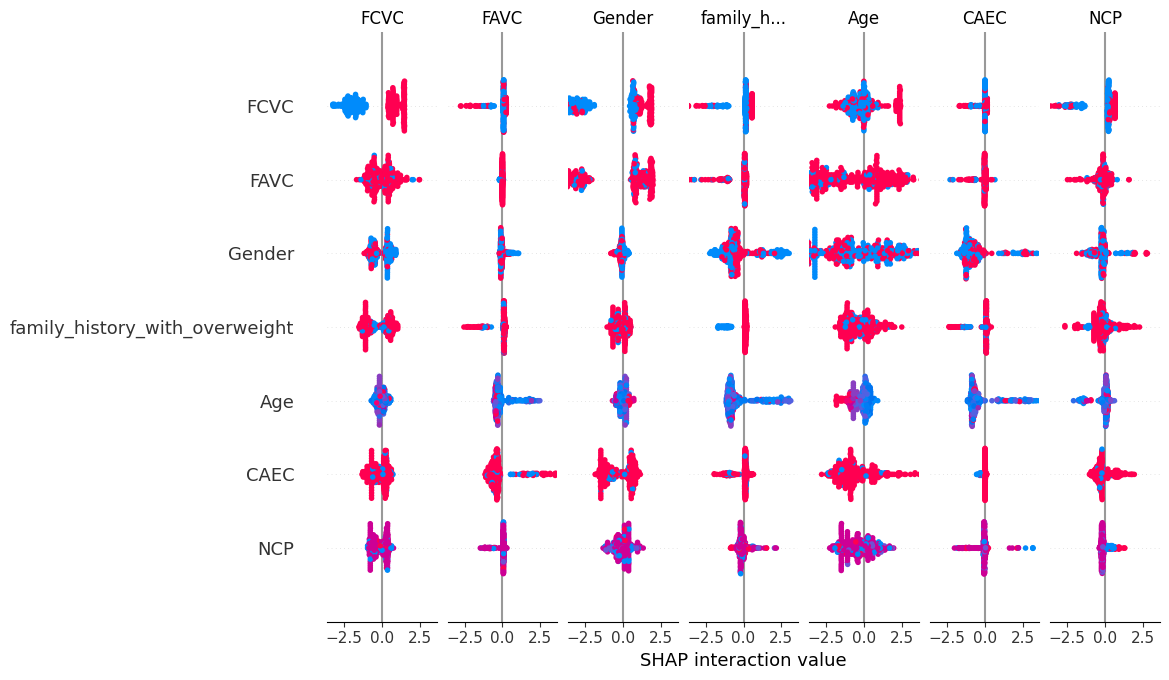

In [41]:
# aplicar SHAP para entender como las características afectan la predicción

import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

**Las variables con mejor comportamiento e impacto significativo en el modelo (alta interacción) son Age, FCVC y FAVC.
Las variables con menor impacto o interacción limitada son Gender y NCP.
family_history_with_overweight y CAEC tienen un impacto intermedio.**

In [42]:
# crear objeto explanation

shap_values_exp = shap.Explanation(values=shap_values,
                                   base_values=explainer.expected_value,
                                   data=X_test, feature_names=X_test.columns)

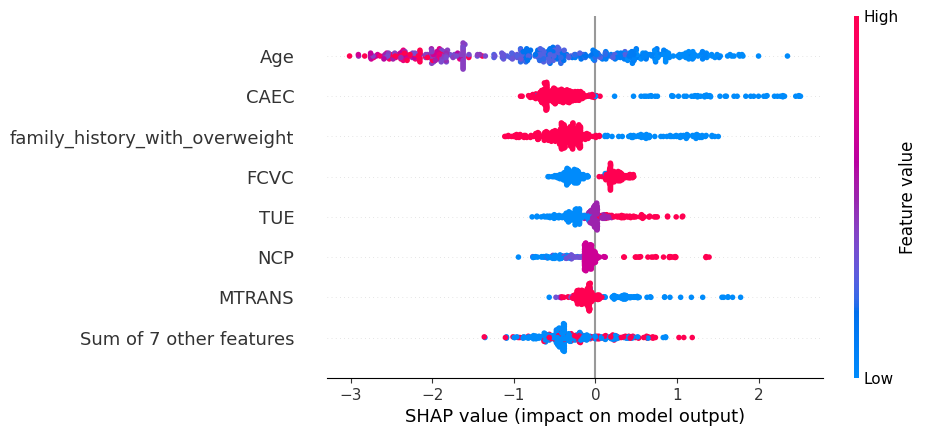

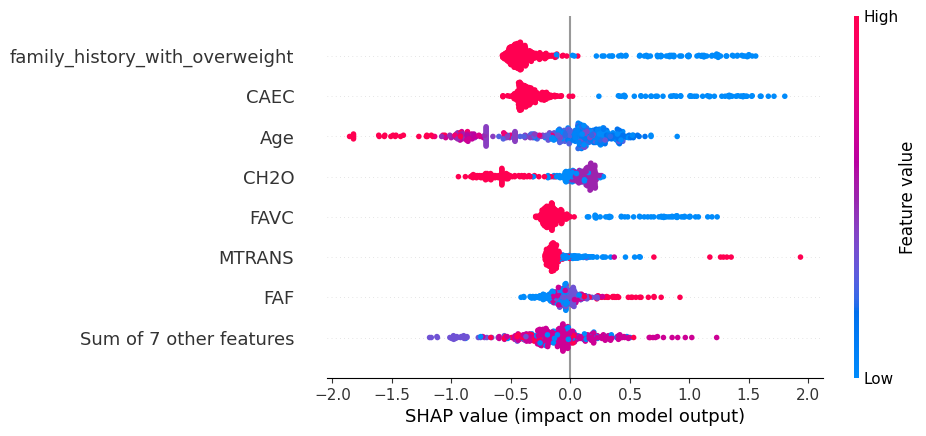

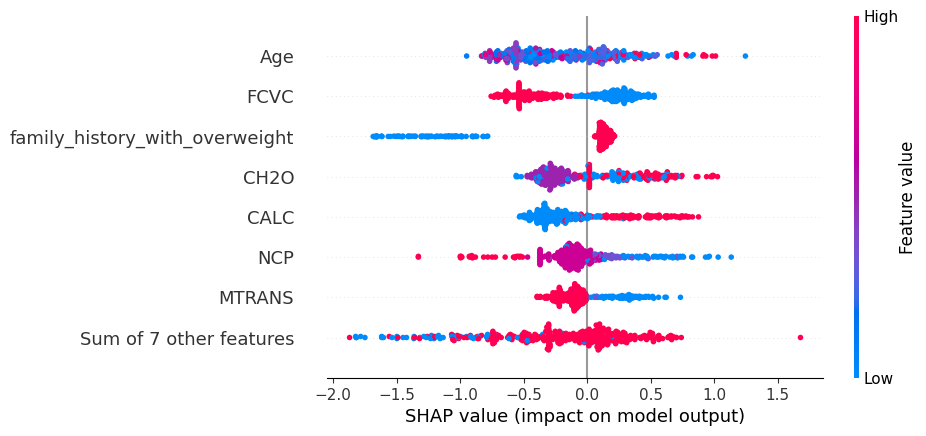

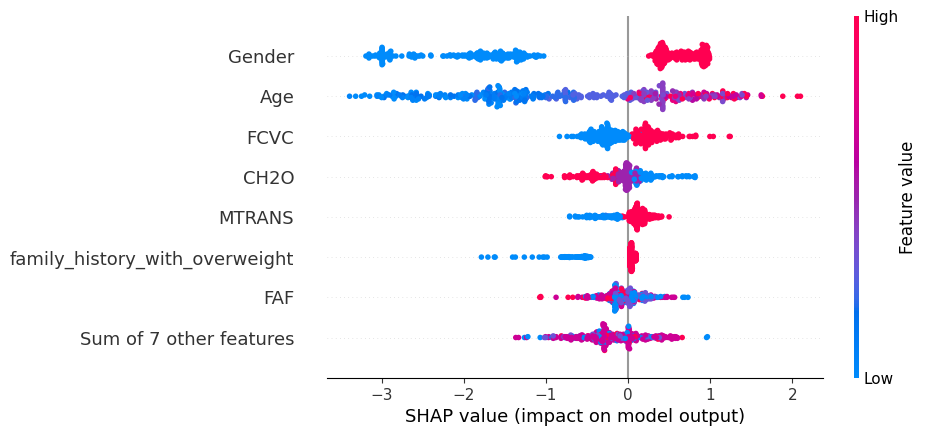

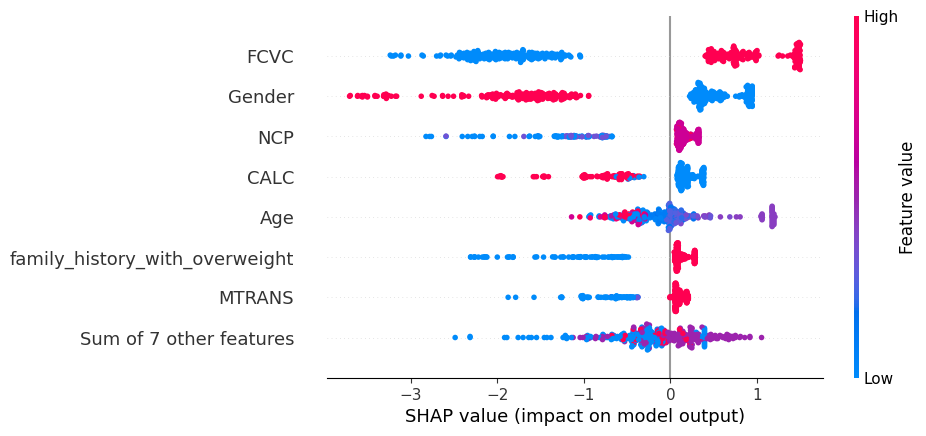

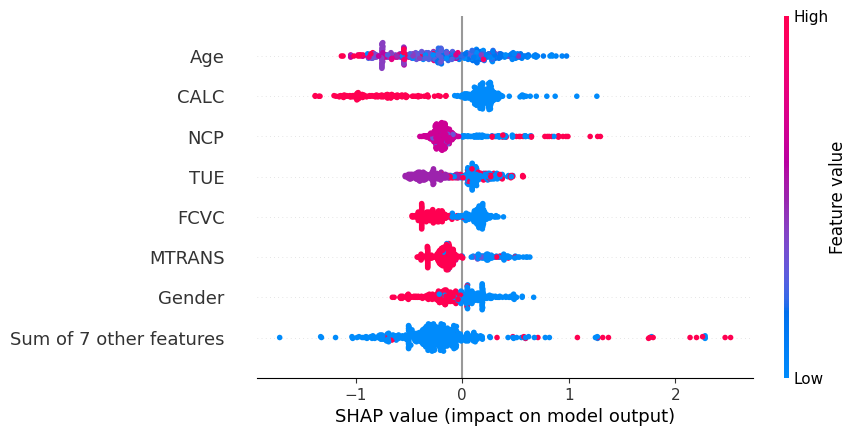

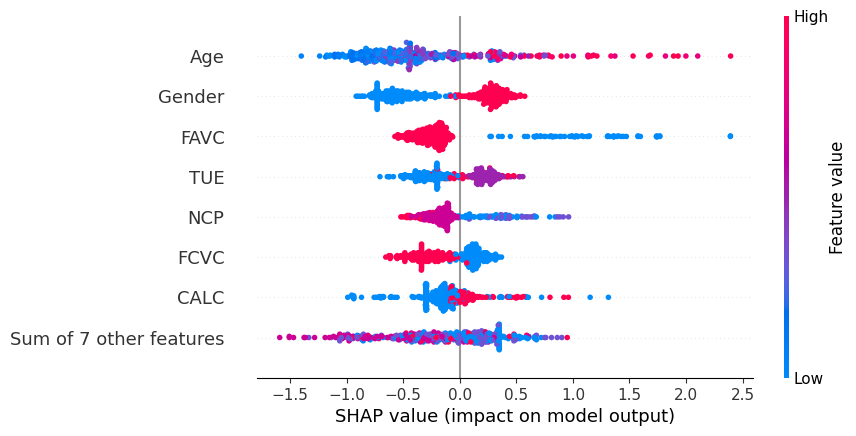

In [43]:
# graficar los valores SHAP de todas las salidas del modelo

for i in range(7):
    shap.plots.beeswarm(shap_values_exp[:,:,i], max_display=8)
    print('='*10)

De acuerdo a las graficas(SHAP) anteriores, se puede concluir que las variables mas relevantes ó que presentan un alto nivel de relacion positiva para la prediccion de los diferentes tipos de obesidad son:

*   CAEC(comportamiento de comer entre comidas): Tiene un impacto notable, visualizando que aquellos con valores altos puedes estar relacionados a una mayor probabilidad de obesidad.
*   family_history_with_overweight: La historia familiar tiene un impacto tambien muy significativo dentro de la predicción, lo cual concluye que los antecedentes familiares si infieren en el resultado de sobrepeso de la persona.
*   Age: La edad muestra unas caracteristicas que afectan el modelo tanto positivo como negativamente, en algunos casos presentando un impacto mas que en otros
*   FCVC o consumo de vegetales en menores cantidades identifican un mayor riesgo de obesidad.



